![](exercise_5_8_1.png)
![](exercise_5_8_2.png)
![](off_policy_mc_control.png)

In [35]:
from IPython.display import clear_output

def track_progress(iteration, episode_length):
    #clear_output(wait = True)
    print(
        f'Episode number: {iteration}\n'
        f'Episode length: {episode_length}\n'
    )

GAMMA = 0.1
EPSILON = 0.1
MAX_ITERATIONS = 1000

def off_policy_mc_control():
    
    action_value = {}
    normalizing_constant = {}
    target_policy = {}  # The target policy is the greedy policy.
    
    # Used to track progress.
    iteration = 1

    while True:
        
        old_action_value = action_value.copy()
                
        behaviour_policy = epsilon_greedy_policy(target_policy, EPSILON)
        
        
        start_state = random.choice(START_STATES)
        episode = run_episode(behaviour_policy, start_state)
        episode = list(reversed(episode))
        
        G = 0.0
        W = 1.0
        
        # Used to track progress.
        episode_length = 1
        
        # Iterate in tuples (t + 1, t)
        for (new_state, new_action, new_reward), (state, action, reward) in zip(episode, episode[1:]):
            print(
                f"cell_type(new_state): {cell_type(new_state)} "
                f"cell_type(state): {cell_type(state)} "
                f"new_state: {new_state} "
                f"state: {state} "
            )
            
            G = GAMMA * G + new_reward
            
            normalizing_constant[(state, action)] = normalizing_constant.get((state, action), 0) + W
            
            action_value[(state, action)] = (
                action_value.get((state, action), 0) +
                W / normalizing_constant.get((state, action), 0) * (G - action_value.get((state, action), 0))
            )
            
            target_policy[state] = best_action(state, action_value)
            
            if action != target_policy[state]:
                ipdb.set_trace()
                break
            
            if action == target_policy[state]:
                W = W / (1 - EPSILON + EPSILON / len(list(actions(state))))
            else:
                W = W / (EPSILON / len(list(actions(state))))
            
            episode_length += 1
            
            
        track_progress(iteration, episode_length)
        iteration += 1
        
        if iteration > MAX_ITERATIONS:
            break
    
    return target_policy, action_value

def run_episode(behaviour_policy, start_state):
    """Used to generate an episode.
    """
    
    # Initialize episode at start state, the 0 action, and 0 reward.
    state = start_state
    episode = [(start_state, 0, 0)]
    
    while cell_type(state) != 'GOAL':
        
        action = behaviour_policy(state)
        
        state = move_car(state, action)
        
        episode.append(
            (state, action, -1)
        )
        
        assert min(action) >= 0 and max(state[2], state[3]) <= 0, (
            f'state: {state} '
            f'action: {action}'
        )
        
    return episode


def epsilon_greedy_policy(target_policy, epsilon = 0.1):
    def policy(state):
        if random.random() <= epsilon:
            return random.choice(list(actions(state)))
        return target_policy.get(state, (0, 0))
    return policy


def best_action(state, action_value):
    """Returns the best action in a state using the action values.
    """
    state_action_value = [(action_value.get((state, action), -10), action) for action in actions(state)]
    best_action = max(state_action_value)[1]
    
    assert isinstance(best_action, tuple), f'best_action: {best_action}'
    return best_action

target_policy, action_value = off_policy_mc_control()

SyntaxError: invalid syntax (<ipython-input-35-350ec7629037>, line 98)

In [33]:
state =(4, 1, 1, 1)
max(state[2], state[3]) <= 0

False

In [29]:
def epsilon_greedy_policy(target_policy, epsilon = 0.1):
    def policy(state):
        if random.random() <= epsilon:
            return random.choice(list(actions(state)))
        return target_policy.get(state, (0, 0))
    return policy

policy = epsilon_greedy_policy({})

for state in states():
    assert max(policy(state)) >= 0, (
        f'state: {state}, list(actions(state)): {list(actions(state))}, policy(state): {policy(state)}'
    )

AssertionError: state: (0, 3, 3, 1), list(actions(state)): [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 0), (0, 1), (1, -1), (1, 0), (1, 1)], policy(state): (0, 0)

In [253]:
list(filter(lambda state: cell_type(state) == 'START', target_policy.keys()))

[(6, 0, 0, 2), (4, 0, 5, 3)]

In [254]:
start_state = random.choice(START_STATES)
def target_policy_(state):
    return target_policy[state]
run_episode(target_policy_, (6, 0, 0, 2))

KeyError: (6, 24, 0, 2)

In [184]:
list(actions((14, 26, 0, 0)))

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [189]:
state

(12, 14, 3, 1)

In [188]:
[(action_value.get((state, action), 0), action) for action in actions(state)]

[(0, (-1, -1)),
 (0, (-1, 0)),
 (0, (-1, 1)),
 (0, (0, -1)),
 (0, (0, 0)),
 (0, (0, 1))]

# Plot a single sample.

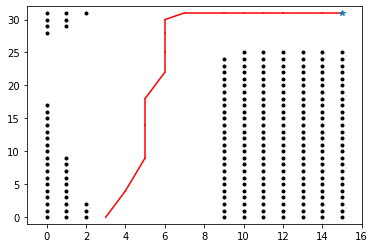

In [214]:
from IPython.display import HTML

ANIMATE = False

start_state = random.choice(START_STATES)
def exploring_policy(state):
    return random.choice(list(actions(state)))
episode = run_episode(exploring_policy, start_state)

def reconstruct_last_episode(episode):
    """Reconstuct a path.
    """
    res = []
    at_starting_state = False
    for state_action_reward in reversed(episode):
        state, _, _ = state_action_reward
        
        if cell_type(state) == 'START':
            at_starting_state = True
        if at_starting_state and cell_type(state) != 'START':
            break
        
        x, y, dx, dy = state
        res.append(
            [x, y]
        )
           
    
    return list(reversed(res))

def plot_walls():
    """Plot the walls in the map.
    """
    for x, y in set(map(
            lambda state: (state[0], state[1]),
            filter(
                lambda state: cell_type(state) == 'WALL',
                list(states())
            )
        )):
        plt.plot([x], [y], marker='o', markersize=3, color="black")

last_episode = reconstruct_last_episode(episode)

def animate(i, reconstructed_episode = last_episode):
    """Used to animate the plot.
    """
    [[x1, y1], [x2, y2]] = reconstructed_episode[i:int(i+2)]
    
    plt.plot([x1,x2],[y1,y2], 'r')
    
    if cell_type((x2, y2, 0, 0)) == 'GOAL':
        plt.plot(x2, y2, '*')
    

    

buffer = 1
ax = plt.axes(xlim=(-buffer, MAX_X + buffer), ylim=(-buffer, MAX_Y + buffer))




if ANIMATE:
    anim = FuncAnimation(fig, animate,frames=len(last_episode) - 1, interval=300, repeat=False)
    HTML(anim.to_html5_video())
else:
    for i in range(len(last_episode)-1):
        animate(i)
    
plot_walls()
    

In [22]:
%debug

> /home/troels/git/reinforcement_learning_sutton/reinforcement_learning_sutton_project/.venv/lib/python3.7/random.py(261)choice()
    259             i = self._randbelow(len(seq))
    260         except ValueError:
--> 261             raise IndexError('Cannot choose from an empty sequence') from None
    262         return seq[i]
    263 

ipdb> episode
*** NameError: name 'episode' is not defined
ipdb> c


# Implementation

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import ipdb
import pandas as pd
import numpy as np
from itertools import product
import random
import ipdb
from matplotlib.animation import FuncAnimation

DEBUG = False

MAP = pd.read_csv('maps/map1.csv', header=None).values
CELL_TYPE_MAP = {
    0: 'WALL',
    1: 'TRACK',
    2: 'GOAL',
    3: 'START',
}

# NB: MAP is row, columns, but we want (x, y) which is the reverse.
MAX_Y = MAP.shape[0] - 1
MAX_X = MAP.shape[1] - 1
MAX_VELOCITY = 5
EPSILON = 0.1


def states():
    """Generates all possible states.
    """
    for x, y, dx, dy in product(
        range(MAX_X + 1), range(MAX_Y + 1), range(0, MAX_VELOCITY + 1), range(0, MAX_VELOCITY + 1)
    ):
        yield (x, y, dx, dy)


def cell_type(state):
    """Cell types is given by values of CELL_TYPE_MAP.
    """
    x, y, dx, dy = state
    
    if 0 <= x <= MAX_X and 0 <= y <= MAX_Y:
        return CELL_TYPE_MAP[MAP[MAX_Y - y, x]]
    
    if 0 <= x <= MAX_X + MAX_VELOCITY and 0 <= y <= MAX_Y + MAX_VELOCITY:
        return 'WALL'
    
    raise ValueError(f'Impossible state: {state}.')


START_STATES = list(filter(lambda state: cell_type(state) == 'START', states()))

In [2]:
START_STATES

[(3, 0, 0, 0),
 (3, 0, 0, 1),
 (3, 0, 0, 2),
 (3, 0, 0, 3),
 (3, 0, 0, 4),
 (3, 0, 0, 5),
 (3, 0, 1, 0),
 (3, 0, 1, 1),
 (3, 0, 1, 2),
 (3, 0, 1, 3),
 (3, 0, 1, 4),
 (3, 0, 1, 5),
 (3, 0, 2, 0),
 (3, 0, 2, 1),
 (3, 0, 2, 2),
 (3, 0, 2, 3),
 (3, 0, 2, 4),
 (3, 0, 2, 5),
 (3, 0, 3, 0),
 (3, 0, 3, 1),
 (3, 0, 3, 2),
 (3, 0, 3, 3),
 (3, 0, 3, 4),
 (3, 0, 3, 5),
 (3, 0, 4, 0),
 (3, 0, 4, 1),
 (3, 0, 4, 2),
 (3, 0, 4, 3),
 (3, 0, 4, 4),
 (3, 0, 4, 5),
 (3, 0, 5, 0),
 (3, 0, 5, 1),
 (3, 0, 5, 2),
 (3, 0, 5, 3),
 (3, 0, 5, 4),
 (3, 0, 5, 5),
 (4, 0, 0, 0),
 (4, 0, 0, 1),
 (4, 0, 0, 2),
 (4, 0, 0, 3),
 (4, 0, 0, 4),
 (4, 0, 0, 5),
 (4, 0, 1, 0),
 (4, 0, 1, 1),
 (4, 0, 1, 2),
 (4, 0, 1, 3),
 (4, 0, 1, 4),
 (4, 0, 1, 5),
 (4, 0, 2, 0),
 (4, 0, 2, 1),
 (4, 0, 2, 2),
 (4, 0, 2, 3),
 (4, 0, 2, 4),
 (4, 0, 2, 5),
 (4, 0, 3, 0),
 (4, 0, 3, 1),
 (4, 0, 3, 2),
 (4, 0, 3, 3),
 (4, 0, 3, 4),
 (4, 0, 3, 5),
 (4, 0, 4, 0),
 (4, 0, 4, 1),
 (4, 0, 4, 2),
 (4, 0, 4, 3),
 (4, 0, 4, 4),
 (4, 0, 4, 5),
 (4, 0, 5,

In [2]:
def actions(state):
    """Generate all velocity vectors at a given state.
    """
    x, y, dx, dy = state
    
    for ddx in [-1, 0, 1]:
        for ddy in [-1, 0, 1]:
            
            new_dx = dx + ddx
            new_dy = dy + ddy
            
            new_x = x + new_dx
            new_y = y + new_dy
            
            # Car can't be outside the track
            if not (0 <= new_x <= MAX_X and 0 <= new_y <= MAX_Y):
                continue
            
            
            # Both velocity components are restricted to be positive and less than 5.
            if not (0 <= new_dx <= MAX_VELOCITY and 0 <= new_dy <= MAX_VELOCITY):
                continue
             
            yield (ddx, ddy)
            

def move_car(state, action):
    """Move a car using the new velocity vector.
    """
    x, y, dx, dy = state
    ddx, ddy = action
    
    new_dx = dx + ddx
    new_dy = dy + ddy
    
    new_x = x + new_dx
    new_y = y + new_dy
    
    new_state = (new_x, new_y, new_dx, new_dy)

    if cell_type(new_state) == 'WALL' or len(list(actions(new_state))) == 0:
        return random.choice(START_STATES)
    return new_state
            


In [3]:

for state in states():
    
    assert len(list(actions(state))) <= 9, f"state: {state}, action: {action}, new_state: {new_state}."
    assert cell_type(state) in CELL_TYPE_MAP.values(), f"state: {state}, action: {action}, new_state: {new_state}."
    
    for action in actions(state):
        
        new_state = move_car(state, action)
        new_x, new_y, new_dx, new_dy = new_state
        
        assert 0 <= new_x <= MAX_X, f"state: {state}, action: {action}, new_state: {new_state}."
        assert 0 <= new_y <= MAX_Y, f"state: {state}, action: {action}, new_state: {new_state}."
        
        assert 0 <= new_dx <= MAX_VELOCITY, f"state: {state}, action: {action}, new_state: {new_state}."
        assert 0 <= new_dy <= MAX_VELOCITY, f"state: {state}, action: {action}, new_state: {new_state}."
        
        assert cell_type(new_state) in CELL_TYPE_MAP.values(), (
            f"state: {state}, action: {action}, new_state: {new_state}."
        )
